<a href="https://colab.research.google.com/github/Gnani0825/Gnaneshwar_INFO5731_Fall2024/blob/main/INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report






In [4]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the train and test files
print("Upload the training file (e.g., stsa-train.txt):")
uploaded_train = files.upload()  # Manually upload stsa-train.txt

print("Upload the testing file (e.g., stsa-test.txt):")
uploaded_test = files.upload()  # Manually upload stsa-test.txt

# Load the train and test datasets into pandas DataFrames
train_file_name = list(uploaded_train.keys())[0]
test_file_name = list(uploaded_test.keys())[0]

train_data = pd.read_csv(train_file_name, header=None, names=["label", "review"], delimiter='\t')
test_data = pd.read_csv(test_file_name, header=None, names=["label", "review"], delimiter='\t')

# Verify the first few rows of the datasets
print("Training Data Sample:")
print(train_data.head())

print("Test Data Sample:")
print(test_data.head())


Upload the training file (e.g., stsa-train.txt):


Saving stsa-train.txt to stsa-train (1).txt
Upload the testing file (e.g., stsa-test.txt):


Saving stsa-test.txt to stsa-test (1).txt
Training Data Sample:
                                               label  review
0  1 a stirring , funny and finally transporting ...     NaN
1  0 apparently reassembled from the cutting-room...     NaN
2  0 they presume their audience wo n't sit still...     NaN
3  1 this is a visually stunning rumination on lo...     NaN
4  1 jonathan parker 's bartleby should have been...     NaN
Test Data Sample:
                                               label  review
0   0 no movement , no yuks , not much of anything .     NaN
1  0 a gob of drivel so sickly sweet , even the e...     NaN
2  0 gangs of new york is an unapologetic mess , ...     NaN
3  0 we never really feel involved with the story...     NaN
4          1 this is one of polanski 's best films .     NaN


In [5]:
# Manually split each line into label and review
def process_data(file_name):
    data = []
    with open(file_name, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.split(maxsplit=1)  # Split only at the first space
            if len(parts) == 2:  # Ensure there are both label and review
                label, review = parts
                data.append((int(label), review.strip()))
    return pd.DataFrame(data, columns=["label", "review"])

# Process the train and test datasets
train_data = process_data(train_file_name)
test_data = process_data(test_file_name)

# Verify the first few rows
print("Training Data Sample:")
print(train_data.head())

print("Test Data Sample:")
print(test_data.head())


Training Data Sample:
   label                                             review
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...
Test Data Sample:
   label                                             review
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .


In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    train_data['review'], train_data['label'], test_size=0.2, random_state=42
)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(test_data['review'])

# Initialize a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)

# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print(f"10-Fold Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

# Train the classifier on the entire training set
classifier.fit(X_train_tfidf, y_train)

# Validate the model on the validation set
y_val_pred = classifier.predict(X_val_tfidf)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test the final model on the test data
y_test_pred = classifier.predict(X_test_tfidf)
print(f"Test Accuracy: {accuracy_score(test_data['label'], y_test_pred):.4f}")
print("Test Classification Report:")
print(classification_report(test_data['label'], y_test_pred))


10-Fold Cross-Validation Accuracy: 0.7682
Validation Accuracy: 0.7847
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.77       671
           1       0.76      0.84      0.80       713

    accuracy                           0.78      1384
   macro avg       0.79      0.78      0.78      1384
weighted avg       0.79      0.78      0.78      1384

Test Accuracy: 0.7831
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       912
           1       0.76      0.82      0.79       909

    accuracy                           0.78      1821
   macro avg       0.78      0.78      0.78      1821
weighted avg       0.78      0.78      0.78      1821



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [7]:
from google.colab import files
uploaded = files.upload()


Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile.csv


In [8]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_name = "Amazon_Unlocked_Mobile.csv"  # Adjust if the file name is different
data = pd.read_csv(file_name)

# Check the dataset structure
print("Dataset Shape:", data.shape)
print("Sample Data:")
print(data.head())

# Drop rows with missing reviews and filter only the 'Reviews' column
data = data.dropna(subset=['Reviews'])  # Ensure no missing values in the 'Reviews' column
reviews = data['Reviews'].apply(str)  # Convert all reviews to string format

# Display the number of rows and a sample of reviews
print("Total Reviews:", len(reviews))
print("Sample Reviews:")
print(reviews.head())


Dataset Shape: (413840, 6)
Sample Data:
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  
Total Reviews: 413770
Sample Reviews:
0    I fe

In [9]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocess the reviews
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

preprocessed_reviews = reviews.apply(preprocess_text)
print("Sample Preprocessed Reviews:")
print(preprocessed_reviews.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Preprocessed Reviews:
0    feel lucky found used (phone us & used hard al...
1    nice phone, nice grade pantach revue. clean se...
2                                              pleased
3       works good goes slow sometimes good phone love
4    great phone replace lost phone. thing volume b...
Name: Reviews, dtype: object


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




TF-IDF K-means Silhouette Score: 0.040116405674599245


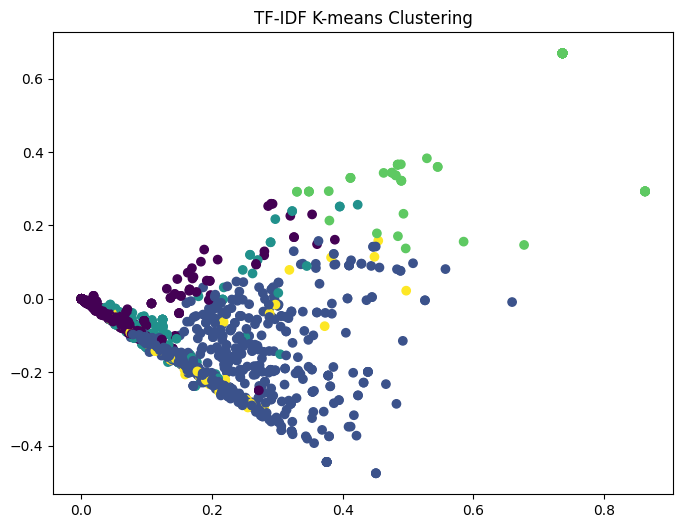

In [11]:

# Use a smaller subset and reduce TF-IDF features
subset_reviews = preprocessed_reviews[:2000]  # Subset of reviews
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(subset_reviews)

# K-means Clustering
kmeans = KMeans(n_clusters=5, max_iter=100, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# Evaluate K-means
silhouette_kmeans = silhouette_score(tfidf_matrix, kmeans_labels)
print(f"TF-IDF K-means Silhouette Score: {silhouette_kmeans}")

# Dimensionality reduction with TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
tfidf_2d = svd.fit_transform(tfidf_matrix)

# Visualize Clustering
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("TF-IDF K-means Clustering")
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Word2Vec K-means Silhouette Score: 0.5505421230204911


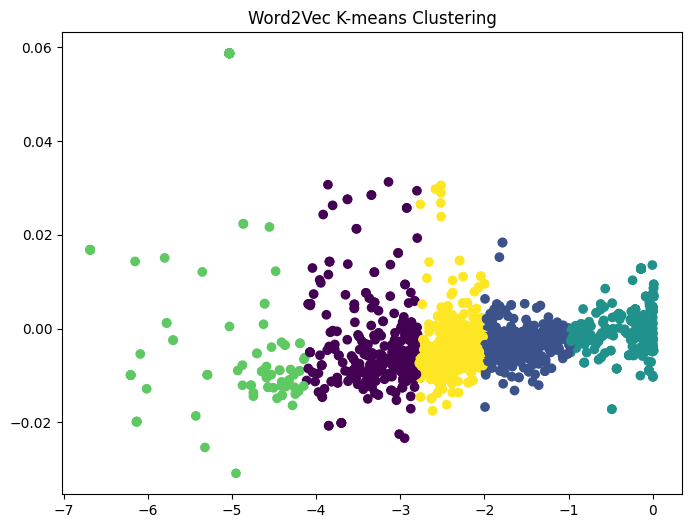

In [12]:
from gensim.models import Word2Vec
import numpy as np

# Generate Word2Vec embeddings
sentences = [review.split() for review in subset_reviews]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv

# Create sentence vectors by averaging word embeddings
sentence_vectors = []
for sentence in sentences:
    vector = np.mean([word_vectors[word] for word in sentence if word in word_vectors], axis=0)
    sentence_vectors.append(vector if isinstance(vector, np.ndarray) else np.zeros(100))

# K-means Clustering on Word2Vec
kmeans_w2v = KMeans(n_clusters=5, max_iter=100, random_state=42)
kmeans_w2v_labels = kmeans_w2v.fit_predict(sentence_vectors)

# Evaluate K-means on Word2Vec
silhouette_w2v = silhouette_score(sentence_vectors, kmeans_w2v_labels)
print(f"Word2Vec K-means Silhouette Score: {silhouette_w2v}")

# Visualize Word2Vec Clustering
w2v_2d = svd.fit_transform(sentence_vectors)
plt.figure(figsize=(8, 6))
plt.scatter(w2v_2d[:, 0], w2v_2d[:, 1], c=kmeans_w2v_labels, cmap='viridis')
plt.title("Word2Vec K-means Clustering")
plt.show()


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

BERT K-means Silhouette Score: 0.08992605656385422


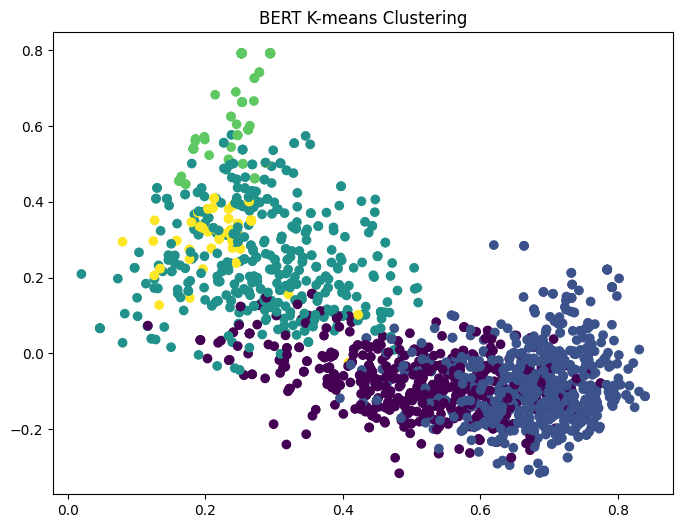

In [13]:
from sentence_transformers import SentenceTransformer

# Generate BERT embeddings
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
bert_embeddings = bert_model.encode(subset_reviews.tolist(), show_progress_bar=True)

# K-means Clustering on BERT
kmeans_bert = KMeans(n_clusters=5, max_iter=100, random_state=42)
kmeans_bert_labels = kmeans_bert.fit_predict(bert_embeddings)

# Evaluate K-means on BERT
silhouette_bert = silhouette_score(bert_embeddings, kmeans_bert_labels)
print(f"BERT K-means Silhouette Score: {silhouette_bert}")

# Visualize BERT Clustering
bert_2d = svd.fit_transform(bert_embeddings)
plt.figure(figsize=(8, 6))
plt.scatter(bert_2d[:, 0], bert_2d[:, 1], c=kmeans_bert_labels, cmap='viridis')
plt.title("BERT K-means Clustering")
plt.show()


DBSCAN Number of Clusters: 4


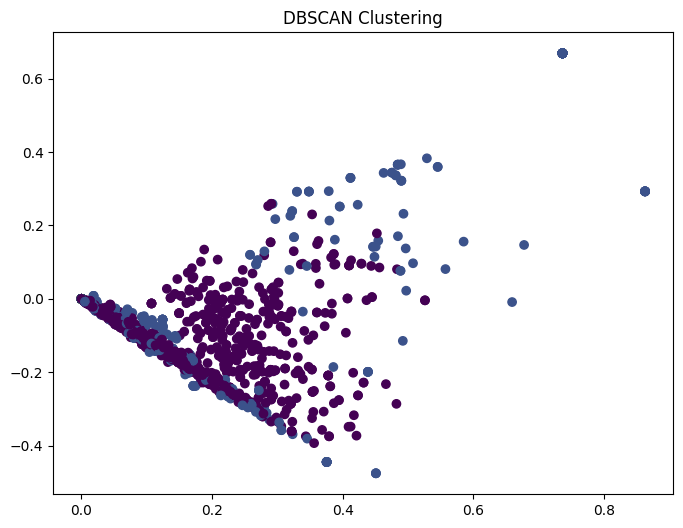

In [14]:
from sklearn.cluster import DBSCAN

# DBSCAN on TF-IDF
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

# Number of clusters
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN Number of Clusters: {num_clusters}")

# Visualize DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


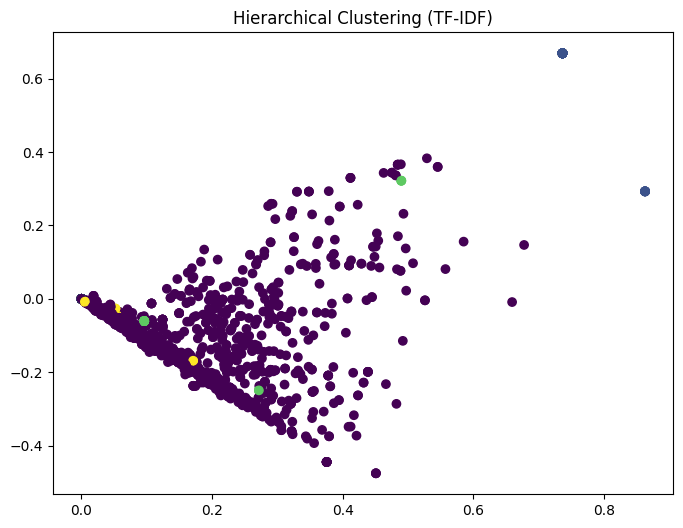

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering on TF-IDF
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(tfidf_matrix.toarray())

# Visualize Hierarchical Clustering
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering (TF-IDF)")
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''